In [1]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
import pandas as pd

file_path = "Employee.csv"
df = pd.read_csv(file_path)

df_info = df.info()
df_head = df.head()
df_description = df.describe(include="all")

df_info, df_head, df_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


(None,
    Company   Age  Salary     Place Country  Gender
 0      TCS  20.0     NaN   Chennai   India       0
 1  Infosys  30.0     NaN    Mumbai   India       0
 2      TCS  35.0  2300.0  Calcutta   India       0
 3  Infosys  40.0  3000.0     Delhi   India       0
 4      TCS  23.0  4000.0    Mumbai   India       0,
        Company         Age       Salary   Place Country      Gender
 count      140  130.000000   124.000000     134     148  148.000000
 unique       6         NaN          NaN      11       1         NaN
 top        TCS         NaN          NaN  Mumbai   India         NaN
 freq        53         NaN          NaN      37     148         NaN
 mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
 std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
 min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
 25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
 50%        NaN   32.500000  5000.000000     NaN     NaN   

In [4]:
import pandas as pd

df = pd.read_csv("Employee.csv")

df.loc[df["Age"] == 0, "Age"] = None

df = df.drop_duplicates()

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Salary"].fillna(df["Salary"].median(), inplace=True)
df["Company"].fillna(df["Company"].mode()[0], inplace=True)
df["Place"].fillna(df["Place"].mode()[0], inplace=True)

if "Country" in df.columns and df["Country"].nunique() == 1:
    df.drop(columns=["Country"], inplace=True)

Q1 = df[["Age", "Salary"]].quantile(0.25)
Q3 = df[["Age", "Salary"]].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[["Age", "Salary"]] < (Q1 - 1.5 * IQR)) | (df[["Age", "Salary"]] > (Q3 + 1.5 * IQR))).sum()

print("Cleaned Employee Data (Preview):")
print(df.head(10))

print("\nNumber of Outliers Detected:")
print(outliers)

Cleaned Employee Data (Preview):
   Company   Age  Salary     Place  Gender
0      TCS  20.0  5000.0   Chennai       0
1  Infosys  30.0  5000.0    Mumbai       0
2      TCS  35.0  2300.0  Calcutta       0
3  Infosys  40.0  3000.0     Delhi       0
4      TCS  23.0  4000.0    Mumbai       0
5  Infosys  33.0  5000.0  Calcutta       0
6      TCS  33.0  6000.0   Chennai       1
7  Infosys  23.0  7000.0    Mumbai       1
8      TCS  34.0  8000.0  Calcutta       1
9      CTS  45.0  9000.0     Delhi       0

Number of Outliers Detected:
Age       0
Salary    0
dtype: int64


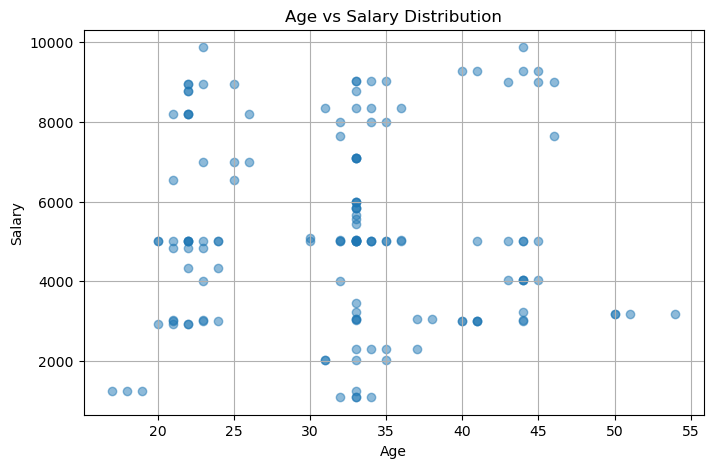

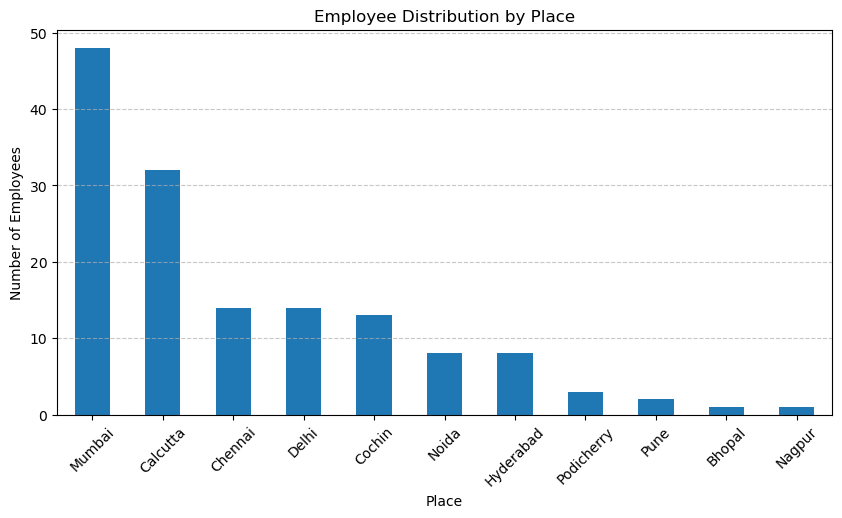

Filtered Data (Age > 40 & Salary < 5000) - Preview:
     Company   Age  Salary      Place  Gender
21   Infosys  50.0  3184.0      Delhi       0
32   Infosys  45.0  4034.0   Calcutta       0
39   Infosys  41.0  3000.0     Mumbai       0
50   Infosys  41.0  3000.0    Chennai       0
57   Infosys  51.0  3184.0  Hyderabad       0
68   Infosys  43.0  4034.0     Mumbai       0
75   Infosys  44.0  3000.0     Cochin       0
86   Infosys  41.0  3000.0      Delhi       0
93   Infosys  54.0  3184.0     Mumbai       0
104  Infosys  44.0  4034.0      Delhi       0


In [5]:
import matplotlib.pyplot as plt

filtered_df = df[(df["Age"] > 40) & (df["Salary"] < 5000)]

plt.figure(figsize=(8, 5))
plt.scatter(df["Age"], df["Salary"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary Distribution")
plt.grid(True)
plt.show()

place_counts = df["Place"].value_counts()

plt.figure(figsize=(10, 5))
place_counts.plot(kind="bar")
plt.xlabel("Place")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Place")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print("Filtered Data (Age > 40 & Salary < 5000) - Preview:")
print(filtered_df.head(10))

In [6]:
import pandas as pd

df_encoded = pd.get_dummies(df, columns=["Company", "Place"], drop_first=True)

print("One-Hot Encoded Data (Preview):")
print(df_encoded.head(10))

One-Hot Encoded Data (Preview):
    Age  Salary  Gender  Company_Congnizant  Company_Infosys  \
0  20.0  5000.0       0               False            False   
1  30.0  5000.0       0               False             True   
2  35.0  2300.0       0               False            False   
3  40.0  3000.0       0               False             True   
4  23.0  4000.0       0               False            False   
5  33.0  5000.0       0               False             True   
6  33.0  6000.0       1               False            False   
7  23.0  7000.0       1               False             True   
8  34.0  8000.0       1               False            False   
9  45.0  9000.0       0               False            False   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False   

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_scaled_standard = df.copy()
df_scaled_minmax = df.copy()

df_scaled_standard[["Age", "Salary"]] = scaler_standard.fit_transform(df[["Age", "Salary"]])
df_scaled_minmax[["Age", "Salary"]] = scaler_minmax.fit_transform(df[["Age", "Salary"]])

print("Standard Scaled Data (Preview):")
print(df_scaled_standard.head(10))

print("\nMin-Max Scaled Data (Preview):")
print(df_scaled_minmax.head(10))

Standard Scaled Data (Preview):
   Company       Age    Salary     Place  Gender
0      TCS -1.484676 -0.100827   Chennai       0
1  Infosys -0.267174 -0.100827    Mumbai       0
2      TCS  0.341577 -1.243735  Calcutta       0
3  Infosys  0.950328 -0.947426     Delhi       0
4      TCS -1.119426 -0.524127    Mumbai       0
5  Infosys  0.098077 -0.100827  Calcutta       0
6      TCS  0.098077  0.322472   Chennai       1
7  Infosys -1.119426  0.745771    Mumbai       1
8      TCS  0.219827  1.169070  Calcutta       1
9      CTS  1.559079  1.592369     Delhi       0

Min-Max Scaled Data (Preview):
   Company       Age    Salary     Place  Gender
0      TCS  0.081081  0.445089   Chennai       0
1  Infosys  0.351351  0.445089    Mumbai       0
2      TCS  0.486486  0.137817  Calcutta       0
3  Infosys  0.621622  0.217480     Delhi       0
4      TCS  0.162162  0.331285    Mumbai       0
5  Infosys  0.432432  0.445089  Calcutta       0
6      TCS  0.432432  0.558894   Chennai       1
7  In